In [1]:
from FLController import *
from ILQGController import *
from LQGController import *

In [4]:
def Asum(MovementArray,DurationArray,Func,ylabel,Noise = 1e-16,ILQG_Activate = True):
    SIZE = len(DurationArray)
    COLORLQG = "green"
    COLORILQG = "orange"
    COLORFL = "blue"
    fig,ax = plt.subplots(figsize = (10,10))

    for MovementLength in MovementArray:

        max_dev_FL = np.zeros(SIZE)
        max_dev_LQG = np.zeros(SIZE)
        max_dev_ILQG = np.zeros(SIZE)
        N = 200
        
        for idx,Duration in enumerate(DurationArray):
            
            for _ in range(N):
                if ILQG_Activate : XILQG,YILQG,_,_ = ILQG(Duration,1e6,1e4,1e-3,targets = [0,20+MovementLength],K = 60,start = [0,20],plot=False,Noise=True)
                XLQG,YLQG,_ = LQG(Duration,1e6,1e6,1e4,1e4,1e-5,1e-5,targets = [MovementLength,20],starting_point = [0,20],plot=False,Activate_Noise=True,Num_iter=60,Delay=.06)
                XFL,YFL = Feedback_Linearization(Duration,1e6,1e6,1e4,1e4,1e-5,1e-5,Num_iter=60,targets = [MovementLength,20],starting_point = [0,20],plot=False,Activate_Noise=True,Delay=.06)
                
                max_dev_FL[idx] += Func(YFL,XFL)/N
                max_dev_LQG[idx] += Func(YLQG,XLQG)/N
                if ILQG_Activate : max_dev_ILQG[idx] += Func(XILQG,YILQG)/N
            print(idx)

        if MovementLength ==MovementArray[0]: 
            plt.plot(DurationArray,max_dev_FL,color = COLORFL,label = "FL Controller",alpha = .3, linestyle = "--")
            plt.plot(DurationArray,max_dev_LQG,color = COLORLQG,label = "LQG Controller")
            if ILQG_Activate : plt.plot(DurationArray,max_dev_ILQG,color = COLORILQG,label = "ILQG Controller")
        
        else : 
            plt.plot(DurationArray,max_dev_LQG,color = COLORLQG)
            if ILQG_Activate : plt.plot(DurationArray,max_dev_ILQG,color = COLORILQG)
            plt.plot(DurationArray,max_dev_FL,color = COLORFL,alpha = .3, linestyle = "--")
    
        
    plt.title(ylabel + " of hand trajectories in function\n of movement time")
    plt.xlabel("Movement Time [seconds]")
    plt.ylabel(ylabel)

    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)

        # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")


    plt.legend()

from scipy.integrate import trapezoid

def Integration(x,y):
    x = np.abs(x)
    area = trapezoid(x,y)
    area = area/(14*14)
    return area

0
1
2
3
4
5
6
7
8
9


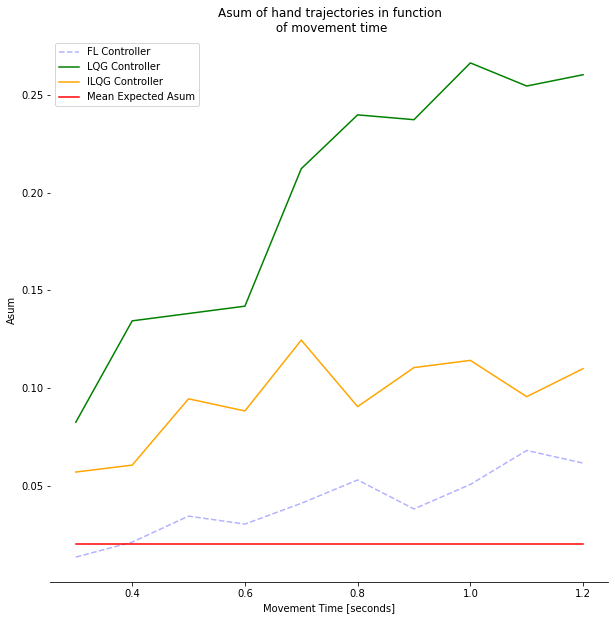

In [6]:
DurationArray = np.linspace(0.3,1.2,10)
MovementArray = [14]

Asum(MovementArray,DurationArray,Integration,"Asum",Noise = 1e-6)
plt.plot(DurationArray,np.ones(len(DurationArray))*0.02,color = "red", label = "Mean Expected Asum")
plt.legend()

0
1
2
3
4
5
6
7
8
9


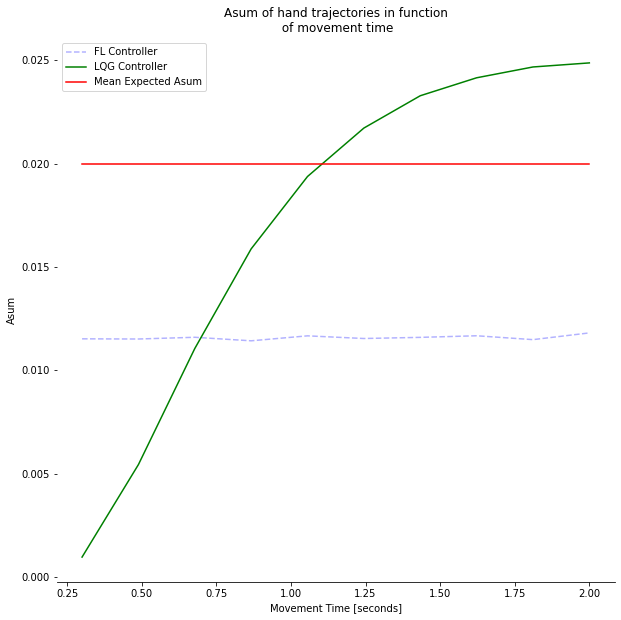

In [6]:
DurationArray = np.linspace(0.3,2,10)
MovementArray = [14]

Asum(MovementArray,DurationArray,Integration,"Asum",Noise = 1e-6,ILQG_Activate=False)
plt.plot(DurationArray,np.ones(len(DurationArray))*0.02,color = "red", label = "Mean Expected Asum")
plt.legend()

0
1
2
3
4
5
6
7
8
9


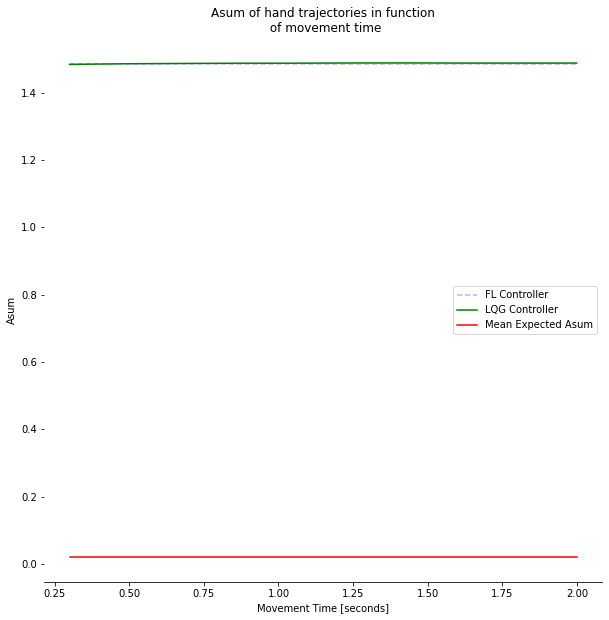

In [5]:
DurationArray = np.linspace(0.3,2,10)
MovementArray = [14]

Asum(MovementArray,DurationArray,Integration,"Asum",Noise = 1e-6,ILQG_Activate=False)
plt.plot(DurationArray,np.ones(len(DurationArray))*0.02,color = "red", label = "Mean Expected Asum")
plt.legend()

5.37280226762249



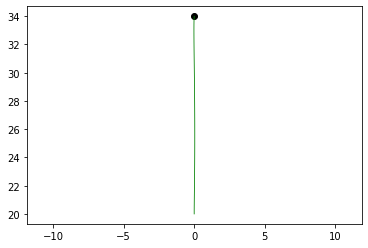

In [17]:
Duration = .2
MovementLength = 14
XFL,YFL,_= LQG(Duration,1e6,1e6,1e4,1e4,1e-5,1e-5,Num_iter=60,targets = [0,20+MovementLength],starting_point = [0,20],plot=True,Activate_Noise=False,Delay=0)
print()
                